<a href="https://colab.research.google.com/github/Francine-Palacios/RedesNeuronales/blob/main/Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

Primero, descargemos los datos.

Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando que consta de un conjunto de entrenamiento de 60,000 ejemplos y un conjunto de prueba de 10,000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28, asociada con una etiqueta de una de las 10 clases.

In [ ]:
datos, metadatos= tfds.load("fashion_mnist", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete97V4VT/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete97V4VT/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir=PosixGPath('/tmp/tmpxs6ne84atfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao an

In [ ]:
nombres_etiqueta=metadatos.features['label'].names
nombres_etiqueta

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Asignamos la data para entrenamiento y para testeo

In [ ]:
train_data, test_data= datos['train'], datos['test']


Ahora vamos a normalizas los datos

In [ ]:
def normalizar(imagenes, etiqueta):
  imagenes= tf.cast(imagenes, tf.float32) #tranforma los datos a tipo float 32
  imagenes /= 255
  return imagenes, etiqueta

train_data= train_data.map(normalizar)
test_data= test_data.map(normalizar)

#Agregar a cache (Usar memoria en lugar de disco, entrenamiento msa rapido)

train_data= train_data.cache()
test_data=test_data.cache()

Mostraremos una imagen

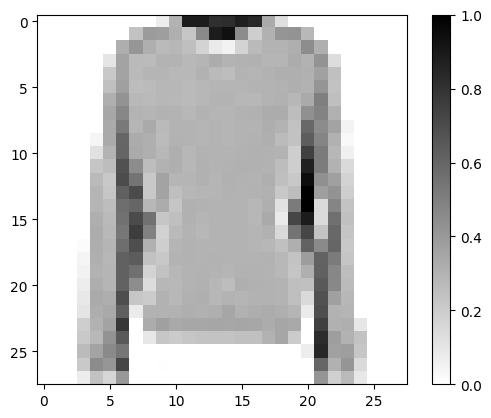

In [ ]:
for imagen, etiqutea in train_data.take(1):
  pass
imagen =imagen.numpy().reshape((28,28))   #Esto es porque tensor flow, guarda todo los datos en un vector de una columna

import matplotlib.pyplot as plt

plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

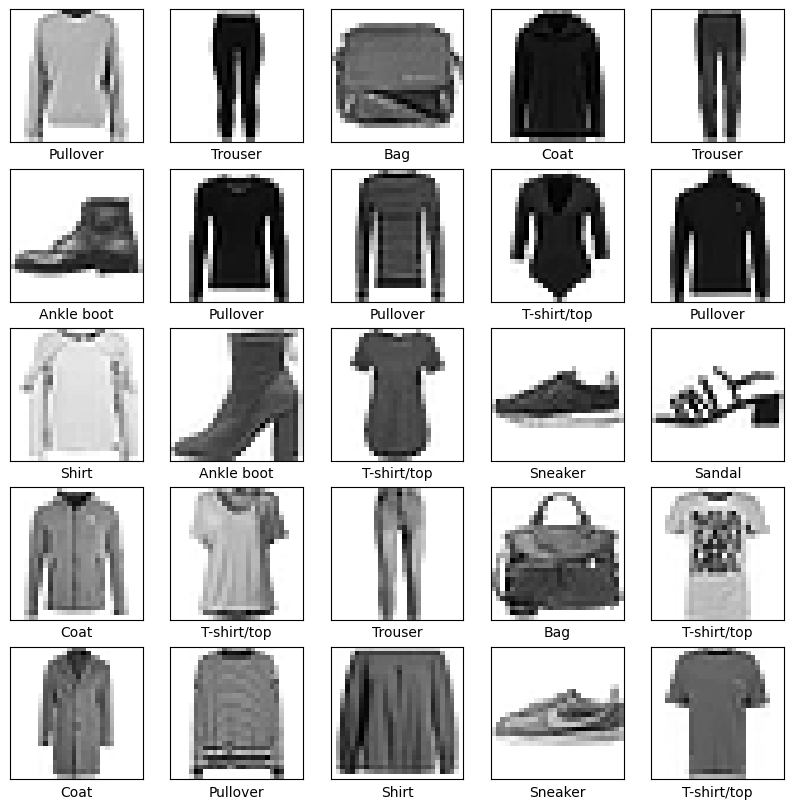

In [ ]:
plt.figure(figsize=(10,10))
for i, (imagen,etiqueta) in enumerate(train_data.take(25)):
  imagen= imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_etiqueta[etiqueta])
plt.show()

Ahora realizaremos nuestro modeo

In [ ]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28,28,1)),     #28,28, dimension de imagen,y el 1 , es por un canal, blanco y negro
                                                      #Flatten se refiere a aplastar los vectores, dejandolo en un solo vector columna la matriz de valores

    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Softmax, se usa para clasificacion, para que si o si clasifique alguno, asi la suma de las probabilidades es 1 de cada clasficacion

      ])

Vamos a compilar el modelo


In [ ]:
modelo.compile(
    optimizer= 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Ahora vamos a entrenar, pero antes ciertas configuraciones en los datos


In [ ]:
N_train=metadatos.splits["train"].num_examples
N_test=metadatos.splits["test"].num_examples

In [ ]:
Tamaño_lote = 32

train_data= train_data.repeat().shuffle(N_train).batch(Tamaño_lote)


In [ ]:
import math

historial = modelo.fit(train_data, epochs=5, steps_per_epoch= math.ceil(60000/Tamaño_lote))

Epoch 1/5
1875/1875 [==============================] - 11s 2ms/step - loss: 0.5211 - accuracy: 0.8156
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3877 - accuracy: 0.8603
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3447 - accuracy: 0.8747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3331 - accuracy: 0.8773
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8845


Ahora veamos la funcion de perdida

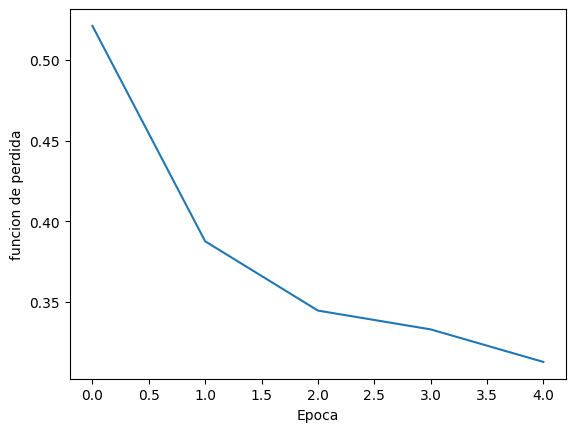

In [ ]:
plt.xlabel("Epoca")
plt.ylabel("funcion de perdida")
plt.plot(historial.history["loss"])
plt.show()

Ahora graficaremos algunas predicciones

In [ ]:
print(test_data.element_spec)

(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


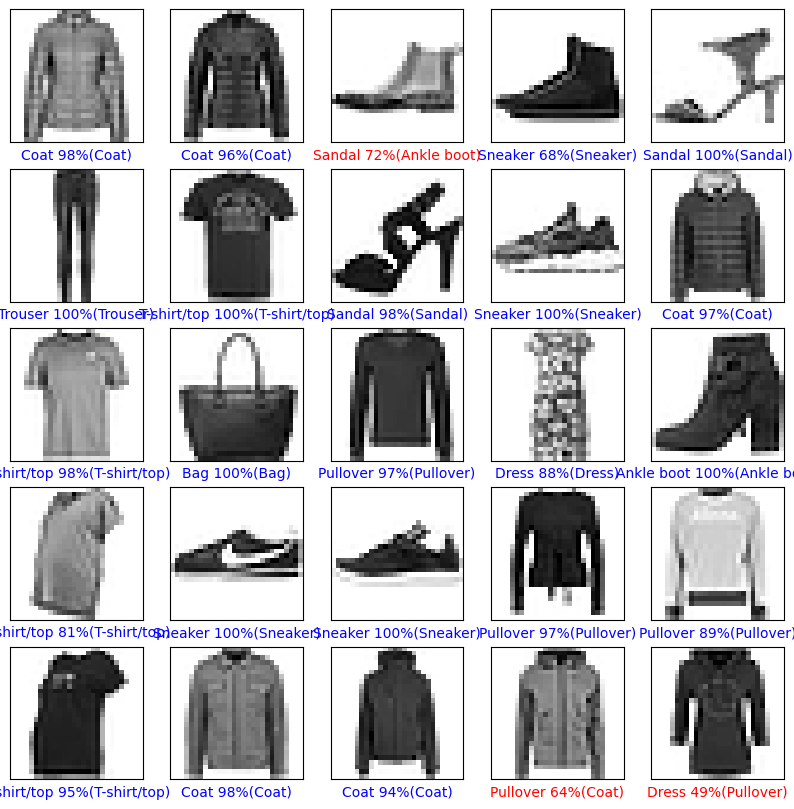

In [ ]:
import numpy as np
filas=5
columnas=5
cantidad=25
plt.figure(figsize=(10,10))

for i, (test_imagen, test_etiqueta) in enumerate(test_data.take(cantidad)):
  prediccion= modelo.predict(np.array([test_imagen.numpy()]),verbose=False)
  test_imagen=test_imagen.numpy().reshape((28,28))

  if np.argmax(prediccion)== test_etiqueta:
    color='blue'
  else:
    color='red'
  plt.subplot(filas,columnas,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_imagen, cmap=plt.cm.binary)
  plt.xlabel(f"{nombres_etiqueta[np.argmax(prediccion)]} {100*np.max(prediccion):2.0f}%({nombres_etiqueta[test_etiqueta]})", color=color)


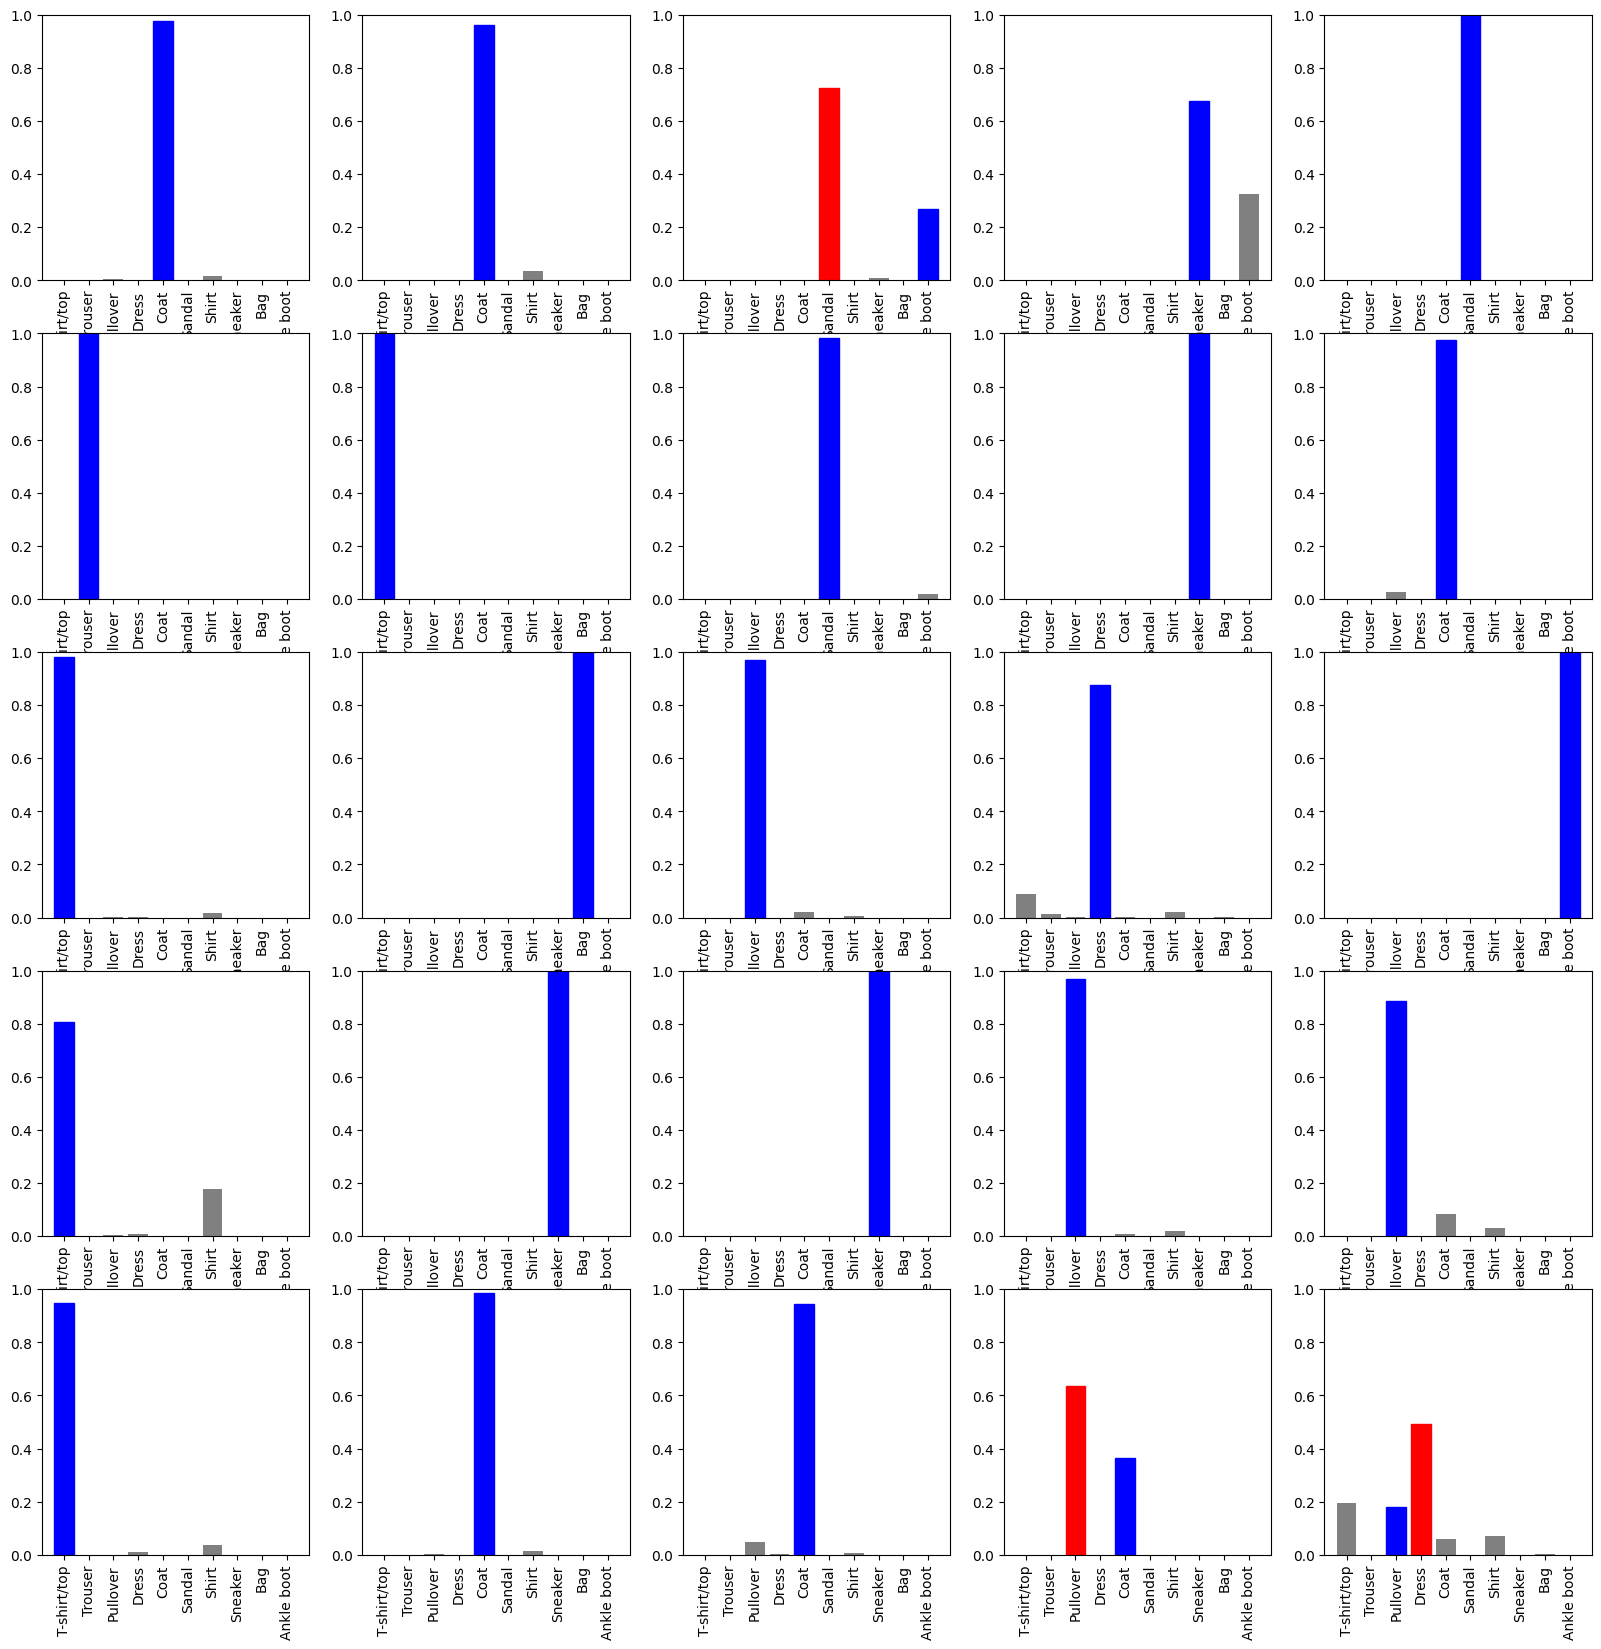

In [ ]:
plt.figure(figsize=(20,20))
for i ,(test_imagen, test_etiqueta) in enumerate(test_data.take(25)):
  plt.subplot(5,5,i+1 )
  prediccion= modelo.predict(np.array([test_imagen.numpy()]), verbose=False)
  plt.xticks(range(10), labels=nombres_etiqueta, rotation=90, fontsize=10)
  # plt.xlabel(nombres_etiqueta)
  # plt.xticks(nombres_etiqueta)
  # plt.yticks([])
  plt.ylim(0,1)
  # print(prediccion)
  barras=plt.bar(range(10), prediccion[0], color="grey")
  barras[np.argmax(prediccion)].set_color('red')
  barras[test_etiqueta].set_color('blue')

plt.show()

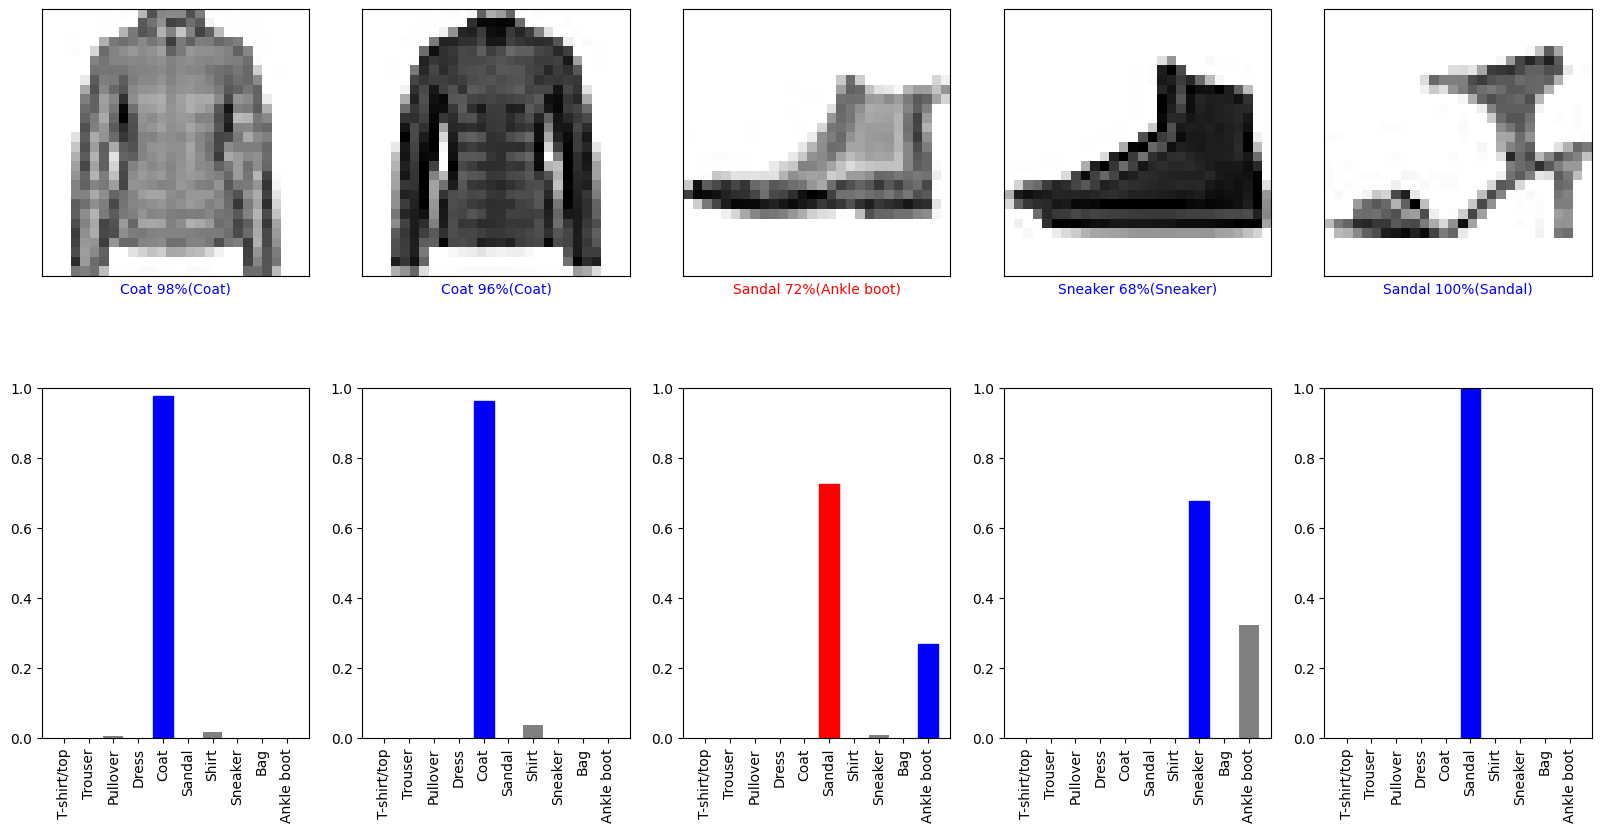

In [ ]:
plt.figure(figsize=(20,10))

for i, (test_imagen, test_etiqueta) in enumerate(test_data.take(5)):
  prediccion= modelo.predict(np.array([test_imagen.numpy()]), verbose=False)
  test_imagen= test_imagen.numpy().reshape((28,28))
  if np.argmax(prediccion)== test_etiqueta:
    color='blue'
  else:
    color='red'
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_imagen, cmap=plt.cm.binary)
  plt.xlabel(f"{nombres_etiqueta[np.argmax(prediccion)]} {100*np.max(prediccion):2.0f}%({nombres_etiqueta[test_etiqueta]})", color=color)

  plt.subplot(2,5,i+6)
  plt.xticks(range(10), labels= nombres_etiqueta, rotation=90)
  # plt.yticks([])
  plt.ylim(0,1)
  # print(prediccion)
  barras=plt.bar(range(10), prediccion[0], color="grey")
  barras[np.argmax(prediccion)].set_color('red')
  barras[test_etiqueta].set_color('blue')

plt.show()

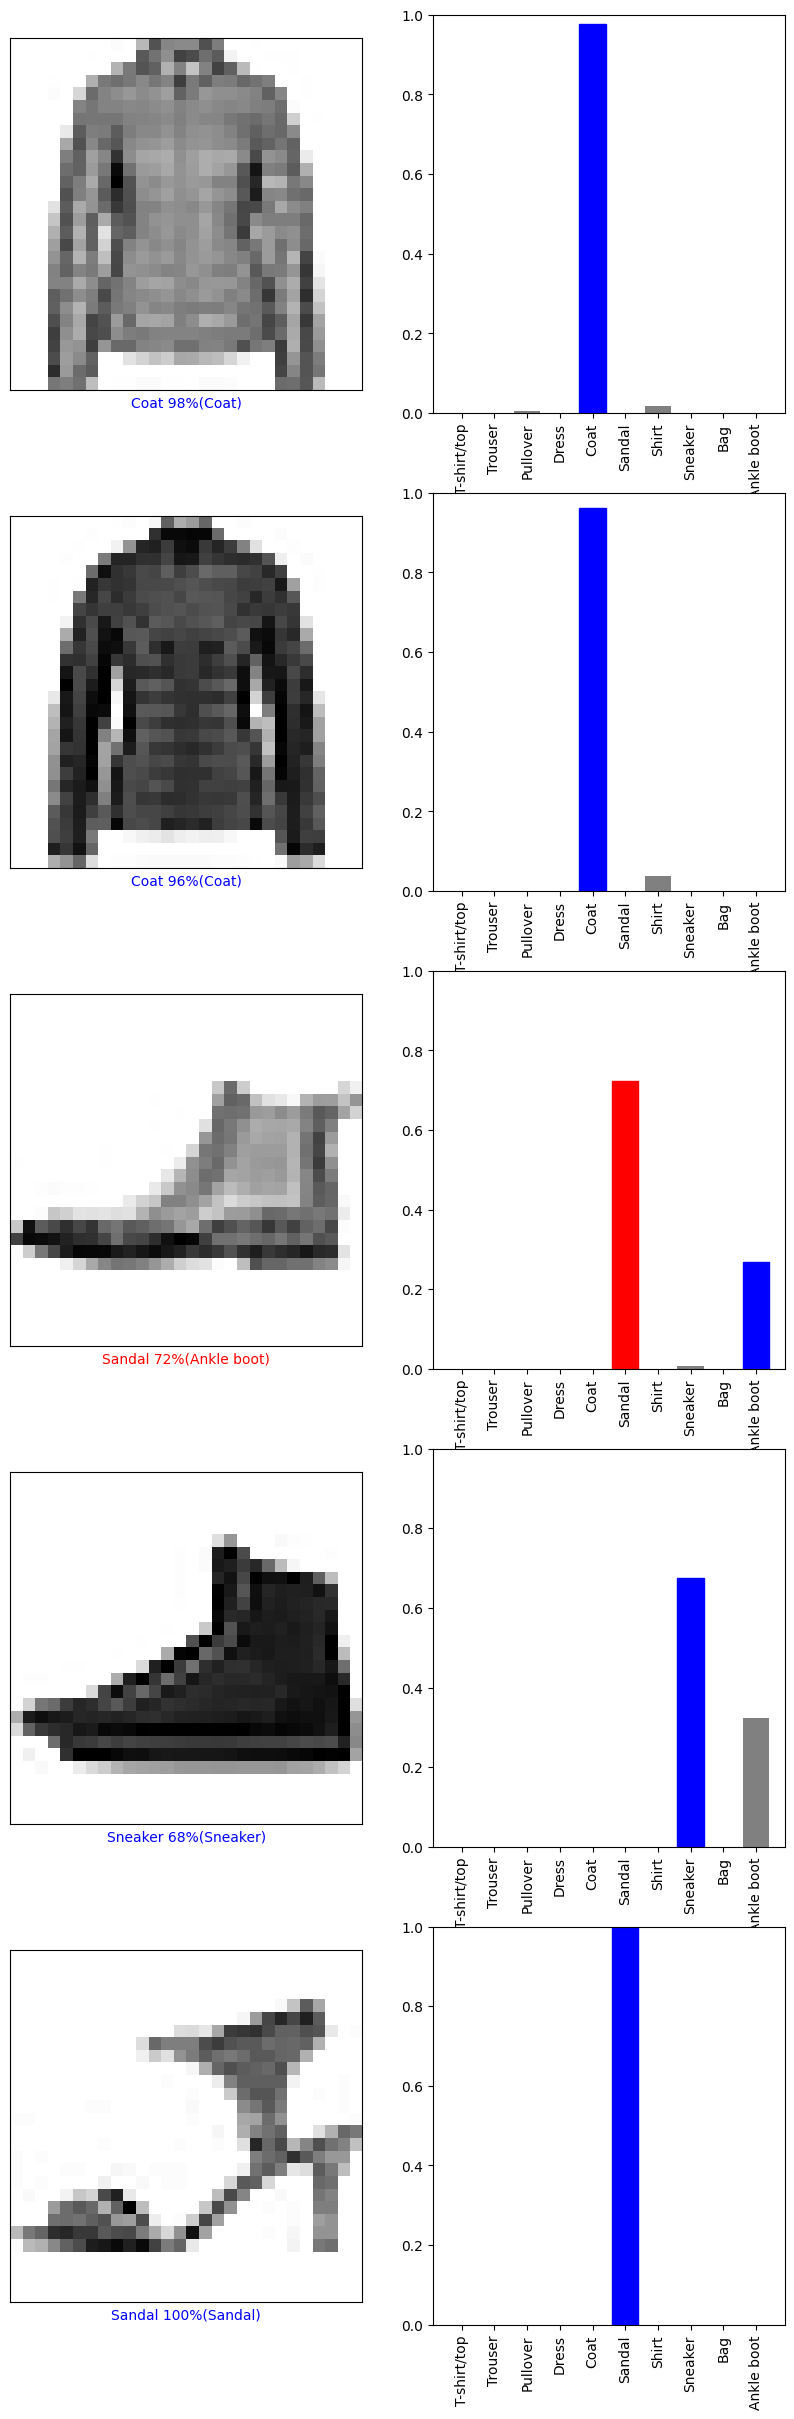

In [ ]:
plt.figure(figsize=(10,30))

for i, (test_imagen, test_etiqueta) in enumerate(test_data.take(5)):
  prediccion= modelo.predict(np.array([test_imagen.numpy()]), verbose=False)
  test_imagen= test_imagen.numpy().reshape((28,28))
  if np.argmax(prediccion)== test_etiqueta:
    color='blue'
  else:
    color='red'
  plt.subplot(5,2,2*i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_imagen, cmap=plt.cm.binary)
  plt.xlabel(f"{nombres_etiqueta[np.argmax(prediccion)]} {100*np.max(prediccion):2.0f}%({nombres_etiqueta[test_etiqueta]})", color=color)

  plt.subplot(5,2,2*i+2)
  plt.xticks(range(10), labels= nombres_etiqueta, rotation=90)
  # plt.yticks([])
  plt.ylim(0,1)
  # print(prediccion)
  barras=plt.bar(range(10), prediccion[0], color="grey")
  barras[np.argmax(prediccion)].set_color('red')
  barras[test_etiqueta].set_color('blue')

plt.show()